In [3]:
import numpy as np
import matplotlib.pyplot as plt

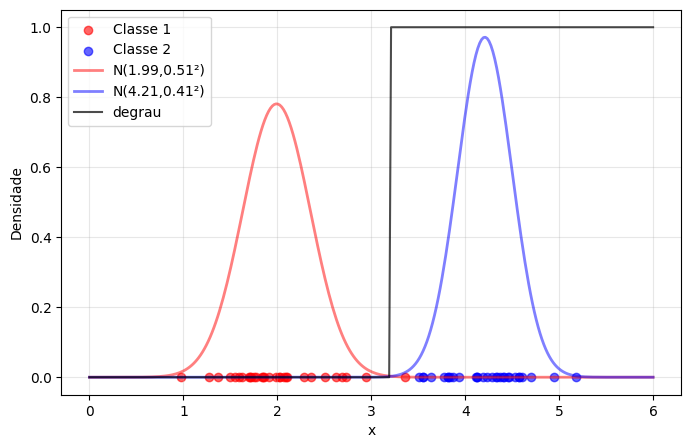

In [4]:
n1 = 30
xc1 = np.random.normal(loc=2, scale=0.5, size=n1)
n2 = 30
xc2 = np.random.normal(loc=4, scale=0.5, size=n2)

nn1 = len(xc1)
nn2 = len(xc1)
y1 = np.zeros(nn1)
y2 = np.zeros(nn2)

plt.figure(figsize=(8,5))
plt.scatter(xc1, y1, color='red', alpha=0.6, label='Classe 1')
plt.scatter(xc2, y2, color='blue',  alpha=0.6, label='Classe 2')

mu1, sigma1 = xc1.mean(), xc1.std()
mu2, sigma2 = xc2.mean(), xc2.std()

xrange = np.linspace(0, 6, 300)

def fnormal1var(mu, sigma, x):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((x-mu)/sigma)**2)

fn1 = fnormal1var(mu1, sigma1, xrange)
fn2 = fnormal1var(mu2, sigma2, xrange)

plt.plot(xrange, fn1, color='red',alpha= 0.5, linewidth=2, label=f'N({mu1:.2f},{sigma1:.2f}²)')
plt.plot(xrange, fn2, color='blue',alpha= 0.5,  linewidth=2, label=f'N({mu2:.2f},{sigma2:.2f}²)')

plt.xlabel('x')
plt.ylabel('Densidade')

plt.grid(alpha=0.3)

nall = nn1 + nn2
pc1 = nn1/nall
pc2 = nn2/nall

pc1x = fn1*pc1/(pc2*fn2 + pc1*fn1)
pc2x = fn2*pc2/(pc2*fn2 + pc1*fn1)

y_hat = [1 if (pc1x-pc2x)[i] < 0 else 0 for i in range(len((pc1x-pc2x)))]
plt.plot(xrange,y_hat,color = 'black', alpha = 0.7,label = 'degrau')
plt.legend()
plt.show()



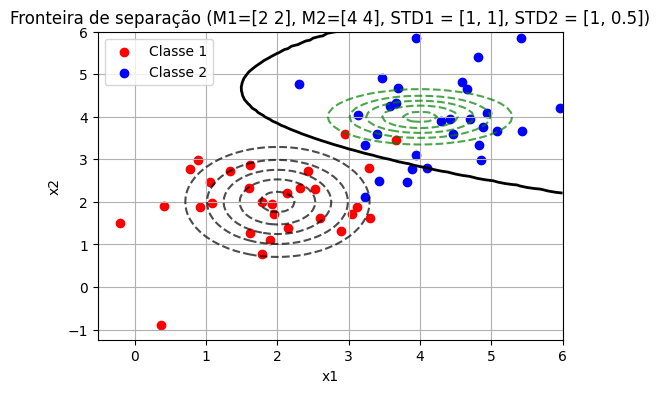

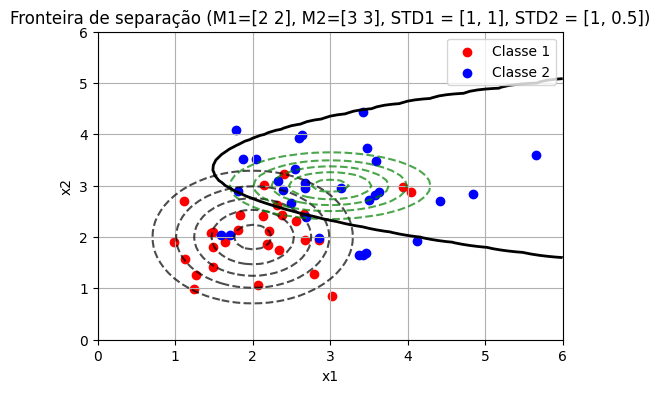

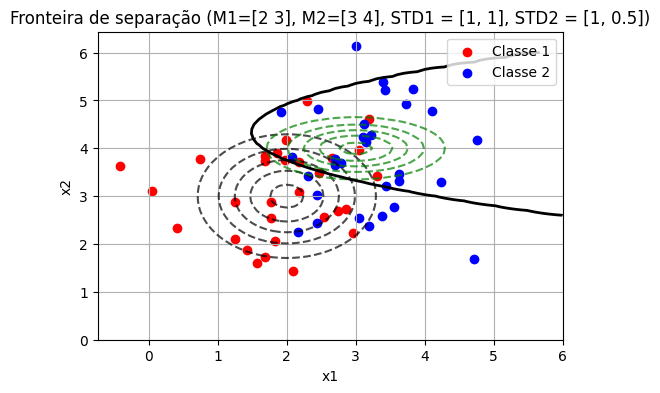

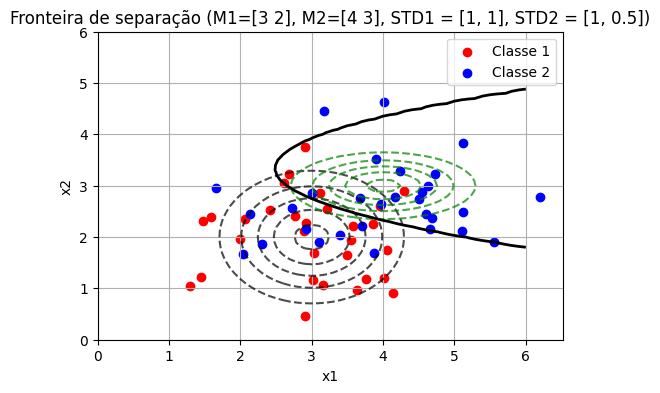

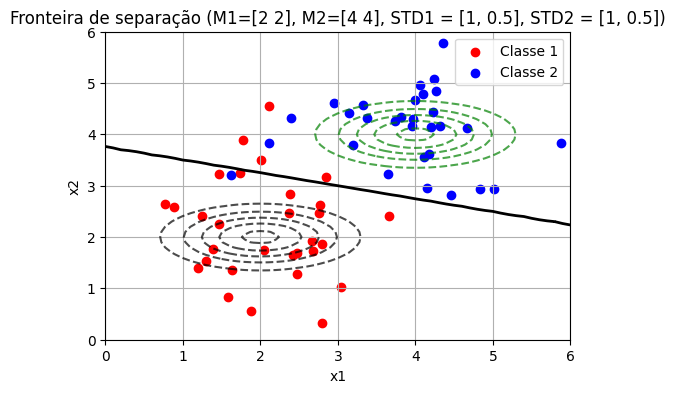

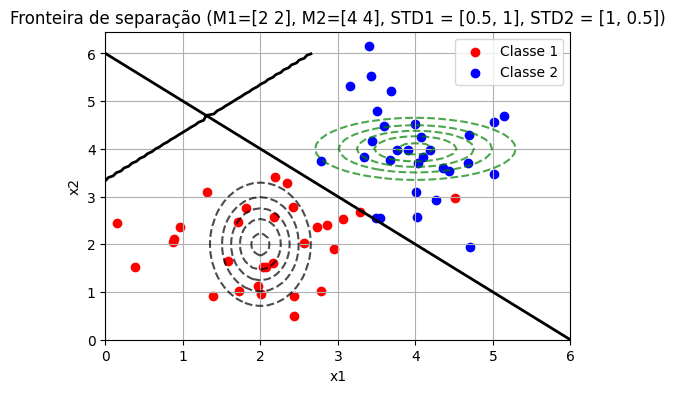

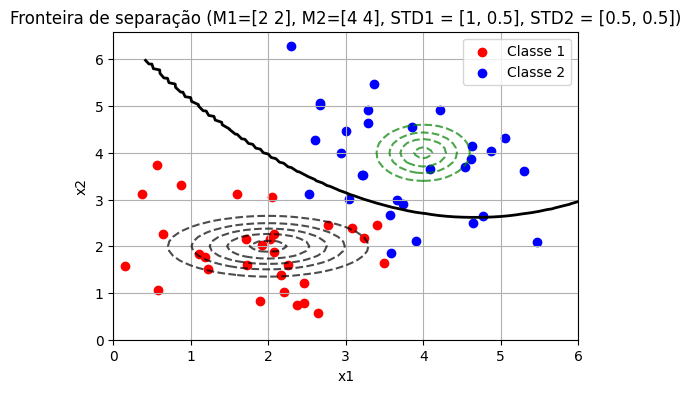

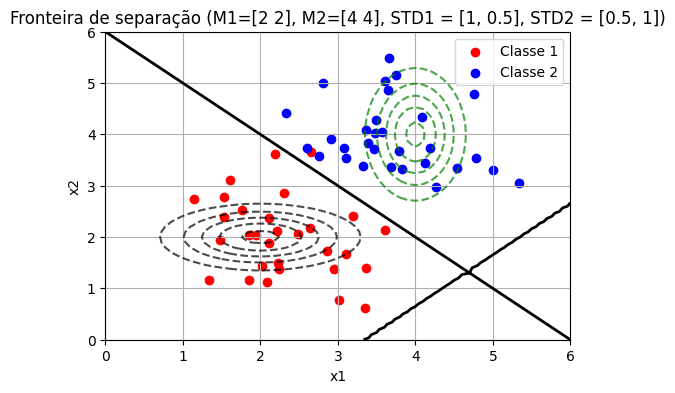

In [7]:
def fnormal2var(m1, m2, s1, s2, x1, x2):
    fNx1 = np.asmatrix(fnormal1var(m1, s1, x1))
    fNx2 = np.asmatrix(fnormal1var(m2, s2, x2))
    pxy = fNx1 * fNx2
    return pxy

def bayes_example(mean1, mean2, std1, std2, N=30):
    
    xc1 = np.random.normal(loc=0, scale=0.8, size=(N,2)) + mean1
    xc2 = np.random.normal(loc=0, scale=0.8, size=(N,2)) + mean2

    xc1x, xc1y = zip(*xc1)
    xc2x, xc2y = zip(*xc2)

    plt.figure(figsize=(6,4))
    plt.scatter(xc1x, xc1y, color='red', marker='o', label='Classe 1')
    plt.scatter(xc2x, xc2y, color='blue', marker='o', label='Classe 2')
    
    # Classificador
    seqx1x2 = np.arange(0, 6.1, 0.1)
    lseq = len(seqx1x2)

    MZ1 = np.empty((lseq, lseq))
    MZ2 = np.empty((lseq, lseq))
    diff = np.zeros((lseq, lseq))

    for i in range(lseq):
        for j in range(lseq):
            x1 = seqx1x2[i]
            x2 = seqx1x2[j]
            MZ1[i, j] = fnormal2var(mean1[0], mean1[1], std1[0], std1[1], x1, x2).item()
            MZ2[i, j] = fnormal2var(mean2[0], mean2[1], std2[0], std2[1], x1, x2).item()
            diff[i, j] = MZ1[i, j] - MZ2[i, j]

    X, Y = np.meshgrid(seqx1x2, seqx1x2)
    plt.contour(X, Y, MZ1.T, levels=5, colors='black', linestyles='dashed', alpha=0.7)
    plt.contour(X, Y, MZ2.T, levels=5, colors='green', linestyles='dashed', alpha=0.7)
    plt.contour(X, Y, diff.T, levels=[0], colors='black', linewidths=2)  # fronteira

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Fronteira de separação (M1={mean1}, M2={mean2}, STD1 = {std1}, STD2 = {std2})')
    plt.legend()
    plt.grid(True)
    plt.show()


cenarios = [
    {"mean1": np.array([2, 2]), "mean2": np.array([4, 4]), "std1": [1,1], "std2": [1,0.5]}, 
    {"mean1": np.array([2, 2]), "mean2": np.array([3, 3]), "std1": [1,1], "std2": [1,0.5]},
    {"mean1": np.array([2, 3]), "mean2": np.array([3, 4]), "std1": [1,1], "std2": [1,0.5]},
    {"mean1": np.array([3, 2]), "mean2": np.array([4, 3]), "std1": [1,1], "std2": [1,0.5]},
    {"mean1": np.array([2, 2]), "mean2": np.array([4, 4]), "std1": [1,0.5], "std2": [1,0.5]},
    {"mean1": np.array([2, 2]), "mean2": np.array([4, 4]), "std1": [0.5,1], "std2": [1,0.5]},
    {"mean1": np.array([2, 2]), "mean2": np.array([4, 4]), "std1": [1,0.5], "std2": [0.5,0.5]},
    {"mean1": np.array([2, 2]), "mean2": np.array([4, 4]), "std1": [1,0.5], "std2": [0.5,1]}
]

for c in cenarios:
    bayes_example(c["mean1"], c["mean2"], c["std1"], c["std2"])
